In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
pip install beautifulsoup4

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import requests

In [6]:
data = pd.read_csv('/content/drive/MyDrive/datasets/kaggle-survey-2021/kaggle_survey_2021_responses.csv')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,...,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool

In [7]:
df = data.iloc[1: , :]
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,...,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,Qlik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,Other,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DataRobot AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,MATLAB,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Mean of Salaries

In [8]:
dataa = df

In [9]:
dataa['Q25'] = dataa['Q25'].str.replace(',', '')
dataa['Q25'] = dataa['Q25'].str.replace('$', '')
dataa['Q25'] = dataa['Q25'].str.replace('>', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [10]:
dataa['Q25']

1        25000-29999
2        60000-69999
3              0-999
4        30000-39999
5        30000-39999
            ...     
25969    15000-19999
25970            NaN
25971          0-999
25972            NaN
25973          0-999
Name: Q25, Length: 25973, dtype: object

In [11]:
dataa['Q25'].size

25973

In [12]:
dataa.dropna(axis=0 , inplace = True, subset = ['Q25'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
m = set(dataa['Q25'])
mean = pd.DataFrame(m)
m

{'0-999',
 '1000-1999',
 '10000-14999',
 '100000-124999',
 '1000000',
 '125000-149999',
 '15000-19999',
 '150000-199999',
 '2000-2999',
 '20000-24999',
 '200000-249999',
 '25000-29999',
 '250000-299999',
 '3000-3999',
 '30000-39999',
 '300000-499999',
 '4000-4999',
 '40000-49999',
 '5000-7499',
 '50000-59999',
 '500000-999999',
 '60000-69999',
 '70000-79999',
 '7500-9999',
 '80000-89999',
 '90000-99999'}

In [14]:

def mean_pay(mean, a_list):

  a_list = a_list.split('-')

  map_object = map(int, a_list)

  #list_of_integers = list(map_object)

  #return(list_of_integers)

  return (map_object[0]+map_object[1])/2

In [15]:
mean['pay'] = mean[0]

In [16]:
def avg(x):
  h = x.split('-')
  if len(h)==2:
   return (int(h[0])+int(h[1]))/2
  if len(h)==1:
    return int(x)


In [17]:
dataa['new_pay']=dataa.Q25.apply(avg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
dataa['Q25'].dropna()

1        25000-29999
2        60000-69999
3              0-999
4        30000-39999
5        30000-39999
            ...     
25967      3000-3999
25968    80000-89999
25969    15000-19999
25971          0-999
25973          0-999
Name: Q25, Length: 15391, dtype: object

In [19]:
dataa.Q25

1        25000-29999
2        60000-69999
3              0-999
4        30000-39999
5        30000-39999
            ...     
25967      3000-3999
25968    80000-89999
25969    15000-19999
25971          0-999
25973          0-999
Name: Q25, Length: 15391, dtype: object

In [20]:
dataa.new_pay

1        27499.5
2        64999.5
3          499.5
4        34999.5
5        34999.5
          ...   
25967     3499.5
25968    84999.5
25969    17499.5
25971      499.5
25973      499.5
Name: new_pay, Length: 15391, dtype: float64

In [21]:
mean

,0,pay
0,4000-4999,4000-4999
1,1000-1999,1000-1999
2,1000000,1000000
3,3000-3999,3000-3999
4,300000-499999,300000-499999
5,200000-249999,200000-249999
6,150000-199999,150000-199999
7,60000-69999,60000-69999
8,125000-149999,125000-149999
9,7500-9999,7500-9999


# 1. Is there any contrast between the languages used by older programmers and newer programmers? 

In [22]:
set(df['Q6']) # making two different dataframes (old and new)

{'1-3 years',
 '10-20 years',
 '20+ years',
 '3-5 years',
 '5-10 years',
 '< 1 years',
 'I have never written code'}

In [23]:
df1 = df
df1 = df1[['Q6','Q7_Part_1','Q7_Part_2','Q7_Part_3','Q7_Part_4','Q7_Part_5','Q7_Part_6','Q7_Part_7','Q7_Part_8','Q7_Part_9','Q7_Part_10','Q7_Part_11','Q7_Part_12','Q7_OTHER']]

In [24]:
df1 = df1.replace(np.nan, '', regex=True)
df1.astype(str)

,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
1,5-10 years,Python,R,,,,,,,,,,,
2,20+ years,,,SQL,C,C++,Java,,,,,,,
3,1-3 years,Python,,,,C++,Java,,,,,,,
4,20+ years,Python,,,,,,,,,,,,
5,< 1 years,Python,,,C,,,,,,,MATLAB,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25967,1-3 years,Python,,,C,,,,,,,,,
25968,5-10 years,Python,,SQL,,,,,,,Bash,,,
25969,1-3 years,Python,,SQL,,,,Javascript,,,Bash,,,
25971,I have never written code,,,,,,,,,,,,,


In [25]:
df1['Q7_Part_1']=df1['Q7_Part_1'].apply(lambda x:x.split())
df1['Q7_Part_2']=df1['Q7_Part_2'].apply(lambda x:x.split())
df1['Q7_Part_3']=df1['Q7_Part_3'].apply(lambda x:x.split())
df1['Q7_Part_4']=df1['Q7_Part_4'].apply(lambda x:x.split())
df1['Q7_Part_5']=df1['Q7_Part_5'].apply(lambda x:x.split())
df1['Q7_Part_6']=df1['Q7_Part_6'].apply(lambda x:x.split())
df1['Q7_Part_7']=df1['Q7_Part_7'].apply(lambda x:x.split())
df1['Q7_Part_8']=df1['Q7_Part_8'].apply(lambda x:x.split())
df1['Q7_Part_9']=df1['Q7_Part_9'].apply(lambda x:x.split())
df1['Q7_Part_10']=df1['Q7_Part_10'].apply(lambda x:x.split())
df1['Q7_Part_11']=df1['Q7_Part_11'].apply(lambda x:x.split())
df1['Q7_Part_12']=df1['Q7_Part_12'].apply(lambda x:x.split())
df1['Q7_OTHER']=df1['Q7_OTHER'].apply(lambda x:x.split())

In [26]:
df1['lang']=df1['Q7_Part_1']+df1['Q7_Part_2']+df1['Q7_Part_3']+df1['Q7_Part_4']+df1['Q7_Part_5']+df1['Q7_Part_6']+df1['Q7_Part_7']+df1['Q7_Part_8']+df1['Q7_Part_9']+df1['Q7_Part_10']+df1['Q7_Part_11']+df1['Q7_Part_12']+df1['Q7_OTHER']

In [27]:
df1.head()

,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,lang
1,5-10 years,[Python],[R],[],[],[],[],[],[],[],[],[],[],[],"[Python, R]"
2,20+ years,[],[],[SQL],[C],[C++],[Java],[],[],[],[],[],[],[],"[SQL, C, C++, Java]"
3,1-3 years,[Python],[],[],[],[C++],[Java],[],[],[],[],[],[],[],"[Python, C++, Java]"
4,20+ years,[Python],[],[],[],[],[],[],[],[],[],[],[],[],[Python]
5,< 1 years,[Python],[],[],[C],[],[],[],[],[],[],[MATLAB],[],[],"[Python, C, MATLAB]"


In [28]:
new = df1[(df1['Q6'].isin(['1-3 years','< 1 years']))]
new.head()

,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,lang
3,1-3 years,[Python],[],[],[],[C++],[Java],[],[],[],[],[],[],[],"[Python, C++, Java]"
5,< 1 years,[Python],[],[],[C],[],[],[],[],[],[],[MATLAB],[],[],"[Python, C, MATLAB]"
10,1-3 years,[Python],[],[SQL],[],[],[],[],[],[],[],[],[],[],"[Python, SQL]"
11,1-3 years,[Python],[R],[SQL],[],[],[],[],[],[],[],[],[],[],"[Python, R, SQL]"
15,< 1 years,[Python],[],[],[],[],[],[],[],[],[],[],[],[],[Python]


In [29]:
old = df1[(df1['Q6'].isin(['20+ years','10-20 years']))]
old.head()

,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,lang
2,20+ years,[],[],[SQL],[C],[C++],[Java],[],[],[],[],[],[],[],"[SQL, C, C++, Java]"
4,20+ years,[Python],[],[],[],[],[],[],[],[],[],[],[],[],[Python]
16,10-20 years,[Python],[],[],[C],[C++],[],[],[],[],[],[MATLAB],[],[],"[Python, C, C++, MATLAB]"
17,20+ years,[Python],[],[SQL],[],[],[],[],[],[],[],[],[],[],"[Python, SQL]"
24,20+ years,[Python],[],[SQL],[],[C++],[],[],[],[],[],[],[],[],"[Python, SQL, C++]"


In [30]:
list_new = new.lang.sum()
list_old = old.lang.sum()

In [31]:
#counting how many new programmers are using the particular language
dummy = ['SQL', 'C', 'C++', 'Java', 'Python', 'R', 'MATLAB', 'Bash', 'Javascript', 'Swift', 'Julia', 'Other','None']
for lang in dummy:
  print(lang,':',list_new.count(lang))

SQL : 2667
C : 672
C++ : 803
Java : 733
Python : 5389
R : 1291
MATLAB : 591
Bash : 271
Javascript : 697
Swift : 33
Julia : 42
Other : 385
None : 128


In [32]:
#counting how many old programmers are using the particular language
dummy = ['SQL', 'C', 'C++', 'Java', 'Python', 'R', 'MATLAB', 'Bash', 'Javascript', 'Swift', 'Julia', 'Other','None']
for lang in dummy:
  print(lang,':',list_old.count(lang))

SQL : 1924
C : 719
C++ : 800
Java : 856
Python : 2871
R : 921
MATLAB : 416
Bash : 731
Javascript : 911
Swift : 81
Julia : 90
Other : 842
None : 18


In [33]:
d = {'lang': ['C++','MATLAB','Python','Javascript','R','Julia','Swift','C','Other','Java','Bash','SQL','None'], 'count_old': [800,416,2871,911,921,90,81,719,842,856,731,1924,18]}
df2003 = pd.DataFrame(data=d)
df2003

,lang,count_old
0,C++,800
1,MATLAB,416
2,Python,2871
3,Javascript,911
4,R,921
5,Julia,90
6,Swift,81
7,C,719
8,Other,842
9,Java,856


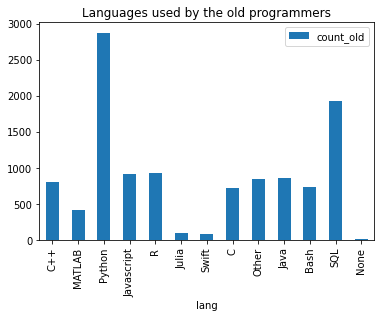

In [34]:
df2003.plot( x='lang', y='count_old', kind='bar' , title = 'Languages used by the old programmers')

In [35]:
d = {'lang': ['C++','MATLAB','Python','Javascript','R','Julia','Swift','C','Other','Java','Bash','SQL','None'], 'count_new': [672,591,5389,697,1291,42,33,672,385,733,271,2667,128]}
df2004 = pd.DataFrame(data=d)
df2004

,lang,count_new
0,C++,672
1,MATLAB,591
2,Python,5389
3,Javascript,697
4,R,1291
5,Julia,42
6,Swift,33
7,C,672
8,Other,385
9,Java,733


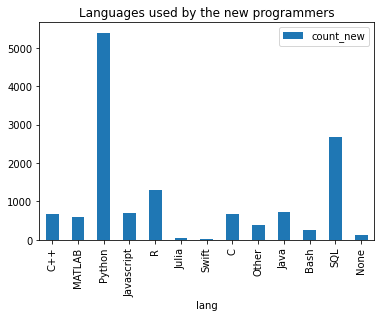

In [36]:
df2004.plot( x='lang', y='count_new', kind='bar' , title = 'Languages used by the new programmers')

In [37]:
df2004['new_programmers'] = df2004.count_new.apply(lambda x:100*x/(df2004.count_new.sum()))
df2004

,lang,count_new,new_programmers
0,C++,672,4.951735
1,MATLAB,591,4.354874
2,Python,5389,39.709675
3,Javascript,697,5.135952
4,R,1291,9.512932
5,Julia,42,0.309483
6,Swift,33,0.243166
7,C,672,4.951735
8,Other,385,2.836932
9,Java,733,5.401223


In [38]:
df2003['old_programmers'] = df2003.count_old.apply(lambda x:100*x/(df2003.count_old.sum()))
df2003

,lang,count_old,old_programmers
0,C++,800,7.155635
1,MATLAB,416,3.720930
2,Python,2871,25.679785
3,Javascript,911,8.148479
4,R,921,8.237925
5,Julia,90,0.805009
6,Swift,81,0.724508
7,C,719,6.431127
8,Other,842,7.531306
9,Java,856,7.656530


In [39]:
df2005 = (pd.merge(df2003, df2004, on='lang'))
df2005

,lang,count_old,old_programmers,count_new,new_programmers
0,C++,800,7.155635,672,4.951735
1,MATLAB,416,3.720930,591,4.354874
2,Python,2871,25.679785,5389,39.709675
3,Javascript,911,8.148479,697,5.135952
4,R,921,8.237925,1291,9.512932
5,Julia,90,0.805009,42,0.309483
6,Swift,81,0.724508,33,0.243166
7,C,719,6.431127,672,4.951735
8,Other,842,7.531306,385,2.836932
9,Java,856,7.656530,733,5.401223


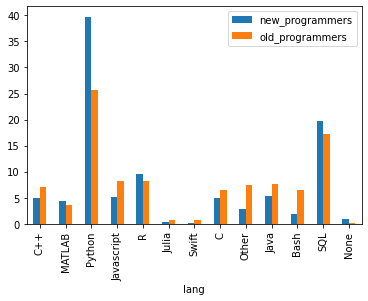

In [40]:
df2005.plot(x="lang", y=["new_programmers", "old_programmers"], kind="bar")

Programmers who are more experienced prefer languages like ***Python, C, Bash, C++, Javascript, Julia, Swift*** over those who are just starting out.
New programmers tend to prefer languages such as ***Python, SQL, MATLAB, and R***

#2. Where are the youngest programmers from? 

In [41]:
set(df['Q1'])

{'18-21',
 '22-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-69',
 '70+'}

In [42]:
young=df[df['Q1']=='18-21']
young.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,...,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER,new_pay
18,479,18-21,Man,Pakistan,Bachelor’s degree,Data Scientist,1-3 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,Visual Studio Code (VSCode),PyCharm,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,Binder / JupyterHub,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,Automated hyperparameter tuning (e.g. hyperopt...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Sagemaker Autopilot,NaN,NaN,NaN,NaN,Weights & Biases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MLflow,NaN,NaN,499.5
59,528,18-21,Man,India,Bachelor’s degree,Machine Learning Engineer,1-3 years,Python,NaN,SQL,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,Visual Studio,Visual Studio Code (VSCode),PyCharm,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499.5
62,405,18-21,Man,Russia,Bachelor’s degree,Machine Learning Engineer,3-5 years,Python,NaN,NaN,NaN,C++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,Visual Studio Code (VSCode),PyCharm,NaN,Notepad++,Sublime Text,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,499.5
95,532,18-21,Man,India,Bachelor’s degree,Data Scientist,< 1 years,Python,NaN,SQL,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,NaN,NaN,NaN,MATLAB,Jupyter Notebook,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Azure Synapse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499.5
132,737,18-21,Man,Egypt,Some college/university study without earning ...,Machine Learning Engineer,1-3 years,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Javascript,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++,Sublime Text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4499.5


In [43]:
a=(young['Q3'].value_counts())
a

India                                                   421
Pakistan                                                 54
Other                                                    43
China                                                    43
Russia                                                   41
Viet Nam                                                 41
Indonesia                                                38
Egypt                                                    28
Nigeria                                                  22
United States of America                                 20
Brazil                                                   16
Turkey                                                   15
Ukraine                                                  11
United Kingdom of Great Britain and Northern Ireland     10
Bangladesh                                               10
Colombia                                                  7
Mexico                                  

In [44]:
y = pd.DataFrame(a)
y.head()

,Q3
India,421
Pakistan,54
Other,43
China,43
Russia,41


In [45]:
y['country'] = y.index
y = y.reset_index()

In [46]:
y.head()

,index,Q3,country
0,India,421,India
1,Pakistan,54,Pakistan
2,Other,43,Other
3,China,43,China
4,Russia,41,Russia


In [47]:
y['country'] = y['country'].replace(['United States of America'],'United States')
y['country'] = y['country'].replace(['United Kingdom of Great Britain and Northern Ireland'],'United Kingdom')

In [48]:
y1 = y[['country']].to_numpy()
y1.shape

(55, 1)

In [49]:
country = []
for sublist in y1:
    for item in sublist:
        country.append(item)

In [50]:
country_array = np.array(country)

In [51]:
set(country_array)

{'Argentina',
 'Australia',
 'Austria',
 'Bangladesh',
 'Belarus',
 'Brazil',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Czech Republic',
 'Denmark',
 'Egypt',
 'France',
 'Germany',
 'Greece',
 'Hong Kong (S.A.R.)',
 'I do not wish to disclose my location',
 'India',
 'Indonesia',
 'Iran, Islamic Republic of...',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Kenya',
 'Malaysia',
 'Mexico',
 'Morocco',
 'Nepal',
 'Netherlands',
 'Nigeria',
 'Norway',
 'Other',
 'Pakistan',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'South Korea',
 'Spain',
 'Sri Lanka',
 'Sweden',
 'Taiwan',
 'Thailand',
 'Tunisia',
 'Turkey',
 'Ukraine',
 'United Kingdom',
 'United States',
 'Viet Nam'}

In [52]:
country_array

array(['India', 'Pakistan', 'Other', 'China', 'Russia', 'Viet Nam',
       'Indonesia', 'Egypt', 'Nigeria', 'United States', 'Brazil',
       'Turkey', 'Ukraine', 'United Kingdom', 'Bangladesh', 'Colombia',
       'Mexico', 'Kenya', 'Canada', 'Thailand', 'Japan', 'Morocco',
       'Spain', 'Poland', 'South Korea', 'Sri Lanka', 'Philippines',
       'Taiwan', 'France', 'Tunisia', 'Saudi Arabia', 'Italy', 'Germany',
       'Belarus', 'Nepal', 'Peru', 'Argentina', 'Kazakhstan',
       'I do not wish to disclose my location', 'Austria', 'Sweden',
       'Denmark', 'Iraq', 'Iran, Islamic Republic of...', 'Australia',
       'Greece', 'Ireland', 'Israel', 'Hong Kong (S.A.R.)', 'Romania',
       'Czech Republic', 'Norway', 'Chile', 'Netherlands', 'Malaysia'],
      dtype='<U37')

In [53]:
from bs4 import BeautifulSoup
import requests

In [54]:
#get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [55]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find('table',{'class':"wikitable"})

In [56]:
wiki=pd.read_html(str(indiatable))
# convert list to dataframe
wiki=pd.DataFrame(wiki[0])
wiki.head()

,Rank,Country or dependent territory,Region,Population,% of world,Date,Source (official or from the United Nations),Notes
0,–,NaN,World,7913726000,NaN,4 Dec 2021,UN projection[2],NaN
1,1,China,Asia,1411778724,NaN,1 Nov 2020,2020 census result[3],"The census figure refers to mainland China, ex..."
2,2,India,Asia,1385135257,NaN,4 Dec 2021,National population clock[4],The figure includes the population of India-ad...
3,3,United States,Americas,332819185,NaN,4 Dec 2021,National population clock[5],Includes the 50 states and the District of Col...
4,4,Indonesia,Asia,271350000,NaN,31 Dec 2020,National annual estimate[6],NaN


In [57]:
wiki.columns

Index(['Rank', 'Country or dependent territory', 'Region', 'Population',
       '% of world', 'Date', 'Source (official or from the United Nations)',
       'Notes'],
      dtype='object')

In [58]:
wiki1 = wiki.drop(["Rank", "% of world","Date","Source (official or from the United Nations)", "Notes", "Region" ], axis=1)
wiki1.head()

,Country or dependent territory,Population
0,NaN,7913726000
1,China,1411778724
2,India,1385135257
3,United States,332819185
4,Indonesia,271350000


In [59]:
wiki1 = wiki1.rename(columns={"Country or dependent territory": "country","Population": "population"})
wiki1.head()

,country,population
0,NaN,7913726000
1,China,1411778724
2,India,1385135257
3,United States,332819185
4,Indonesia,271350000


In [60]:
# by selecting all rows from first row onwards
wiki1 = wiki1.iloc[1: , :]
wiki1

,country,population
1,China,1411778724
2,India,1385135257
3,United States,332819185
4,Indonesia,271350000
5,Pakistan,225200000
...,...,...
237,Niue (New Zealand),1549
238,Tokelau (New Zealand),1501
239,Vatican City,825
240,Cocos (Keeling) Islands (Australia),573


In [61]:
y.iloc[14]

index      Bangladesh
Q3                 10
country    Bangladesh
Name: 14, dtype: object

In [62]:
out = (wiki1.merge(y, left_on='country', right_on='country')
          .reindex(columns=['country', 'Q3', 'population']))
out.head()

,country,Q3,population
0,China,43,1411778724
1,India,421,1385135257
2,United States,20,332819185
3,Indonesia,38,271350000
4,Pakistan,54,225200000


In [63]:
out['percentage'] = out['Q3']/out['population']
out.head()

,country,Q3,population,percentage
0,China,43,1411778724,3.045803e-08
1,India,421,1385135257,3.039414e-07
2,United States,20,332819185,6.009269e-08
3,Indonesia,38,271350000,1.400405e-07
4,Pakistan,54,225200000,2.397869e-07


In [64]:
print(20/332819185)
print(2/5867412)

6.009268966871607e-08
3.408657854604381e-07


In [65]:
out = out.sort_values(by='percentage',ascending= False)
out.head()

,country,Q3,population,percentage
47,Denmark,2,5867412,3.408658e-07
45,Belarus,3,9349645,3.208678e-07
1,India,421,1385135257,3.039414e-07
8,Russia,41,146171015,2.804934e-07
12,Egypt,28,102642215,2.727922e-07


Most of the youngest developers come from India, which is understandable since it is the second-most populous country. Thus, **Denmark** has the highest percentage of young programmers, followed by **Belarus** and **India**.

# 3. Does having more education mean more money?

In [67]:
df['Q25'] = df['Q25'].str.replace(',', '')
df['Q25'] = df['Q25'].str.replace('$', '')
df['Q25'] = df['Q25'].str.replace('>', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [68]:
df['Q4'].value_counts()

Master’s degree                                                      6799
Bachelor’s degree                                                    4777
Doctoral degree                                                      2217
Some college/university study without earning a bachelor’s degree     746
I prefer not to answer                                                334
Professional doctorate                                                290
No formal education past high school                                  228
Name: Q4, dtype: int64

In [69]:
df_master = df[df['Q4']== 'Master’s degree'].copy()
df_bachelor = df[df['Q4']== 'Bachelor’s degree'].copy()
df_doc = df[df['Q4']== 'Doctoral degree'].copy()
df_nodeg = df[df['Q4']== 'Some college/university study without earning a bachelor’s degree'].copy()
df_noans = df[df['Q4']== 'I prefer not to answer'].copy()
df_highscl = df[df['Q4']== 'No formal education past high school'].copy()
df_pdoc = df[df['Q4']== 'Professional doctorate'].copy()

In [70]:
df['Q25'].value_counts()

0-999            3369
1000-1999         969
10000-14999       950
30000-39999       741
100000-124999     725
5000-7499         699
50000-59999       697
40000-49999       688
20000-24999       587
2000-2999         575
15000-19999       573
7500-9999         552
60000-69999       551
25000-29999       470
70000-79999       464
4000-4999         456
150000-199999     392
80000-89999       391
3000-3999         380
125000-149999     379
90000-99999       350
200000-249999     177
300000-499999      91
250000-299999      75
1000000            58
500000-999999      32
Name: Q25, dtype: int64

In [71]:
a = df_master['Q25'].value_counts()

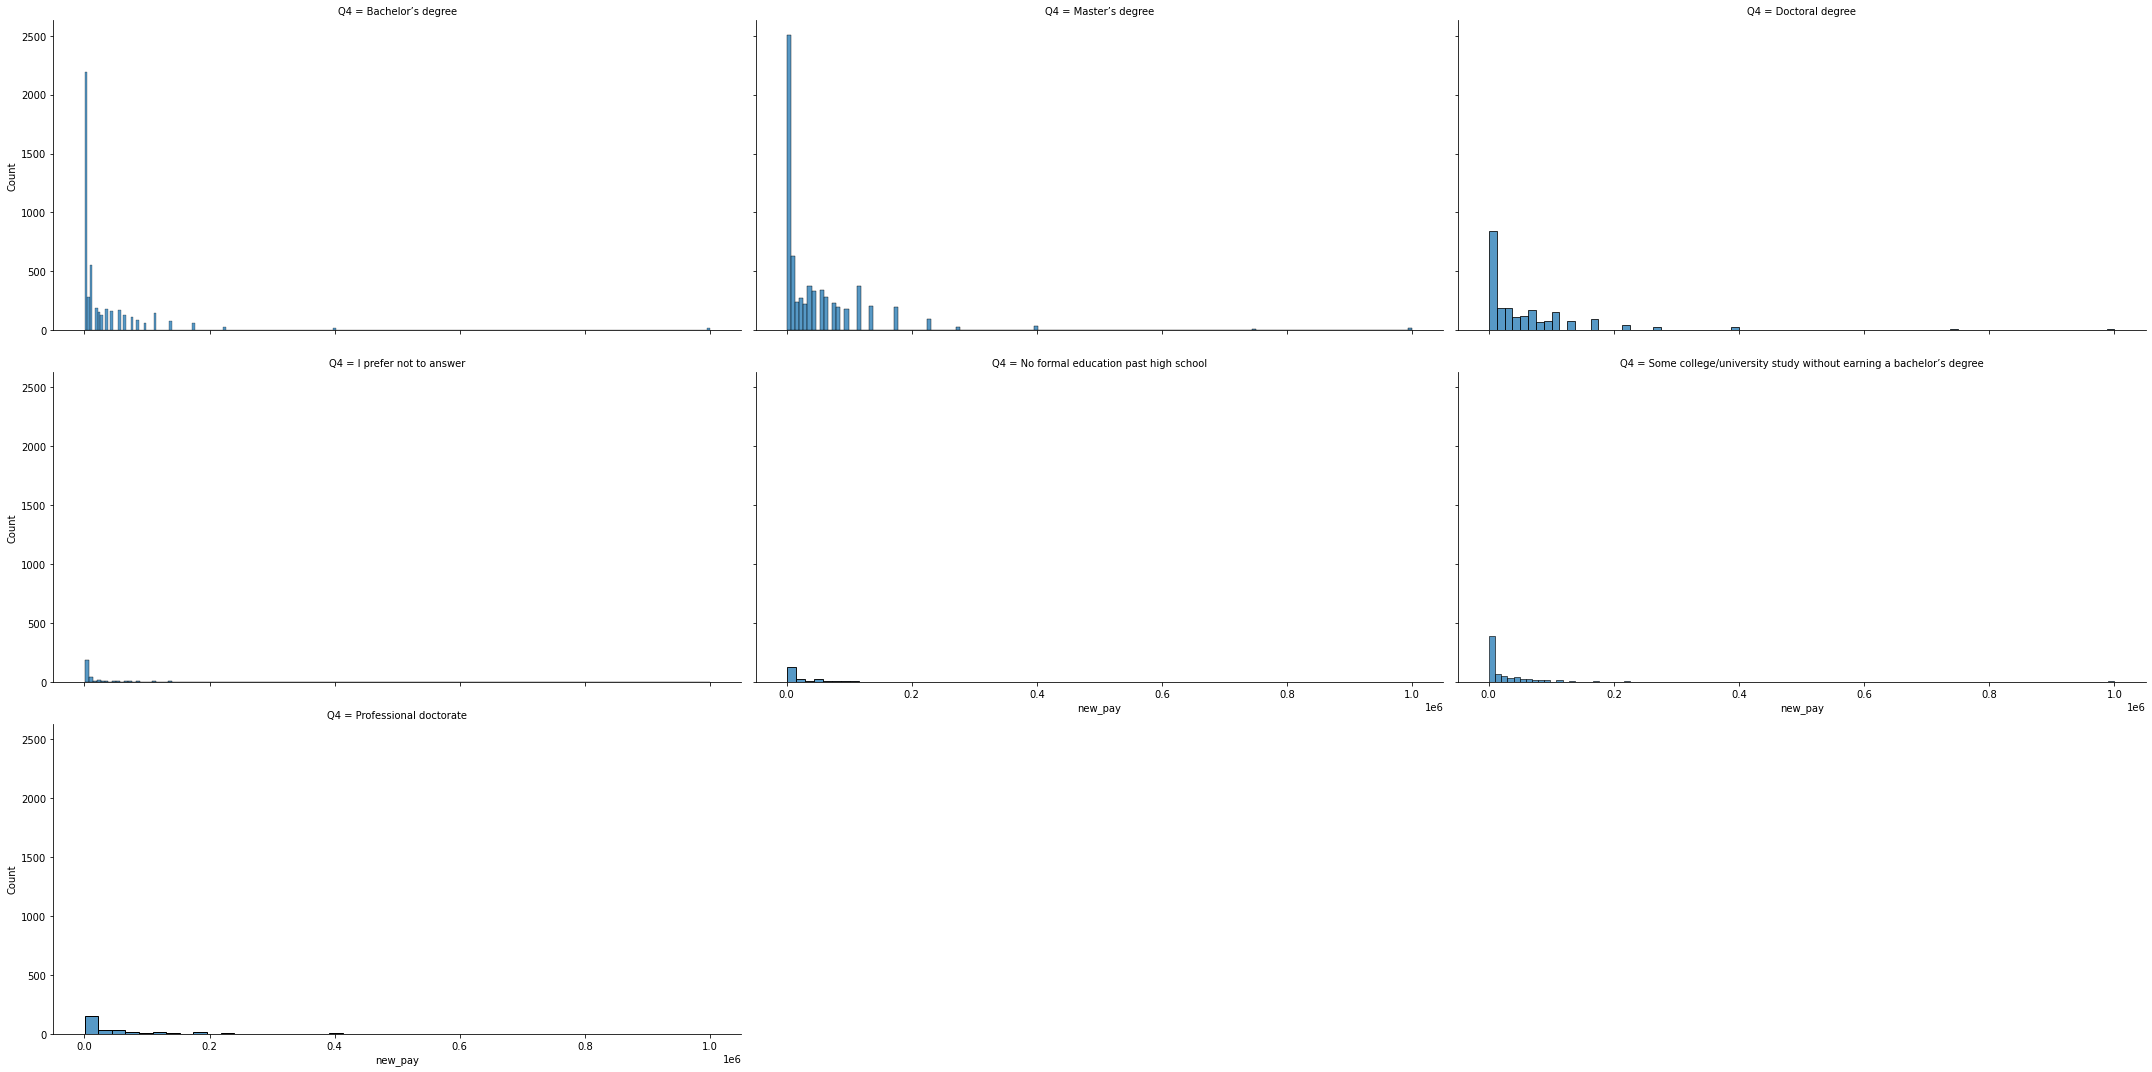

In [72]:
#define grid with two plots per row
g = sns.FacetGrid(data=dataa, col='Q4', col_wrap=3, height=5, aspect=2)

#add histograms to each plot
g.map(sns.histplot, 'new_pay')

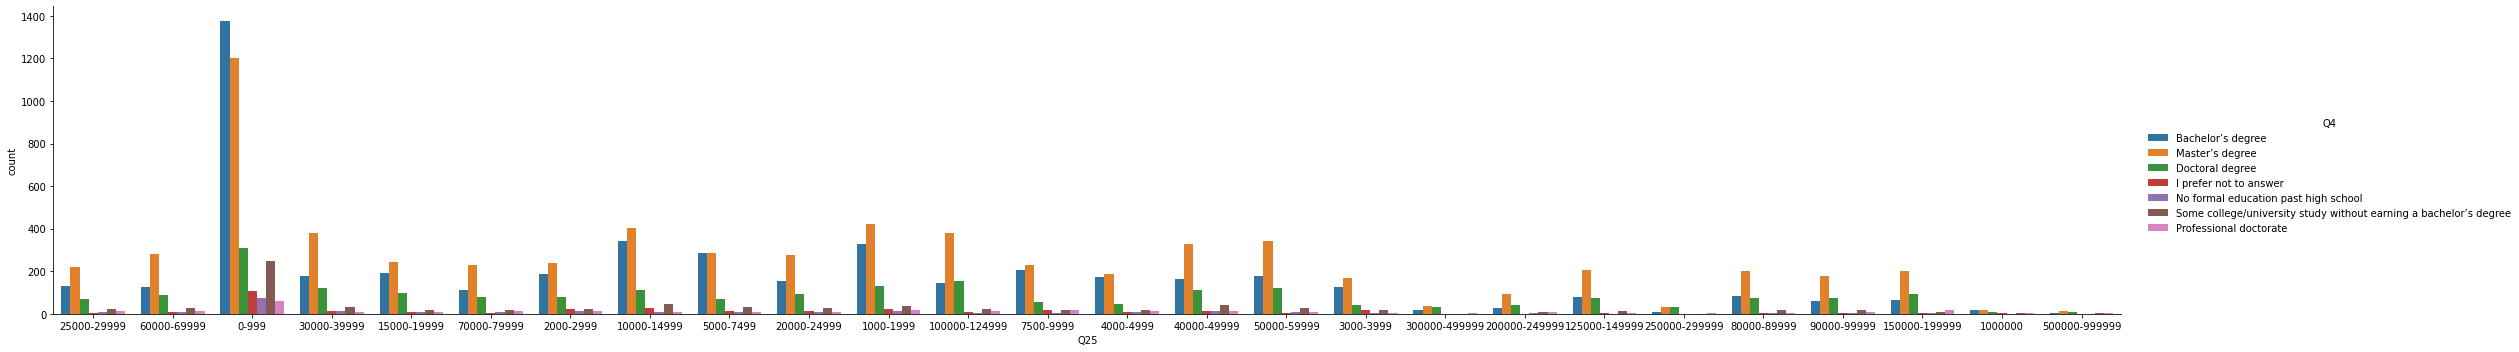

In [73]:
sns.catplot(x="Q25",kind='count',hue='Q4',data=df, aspect=6)

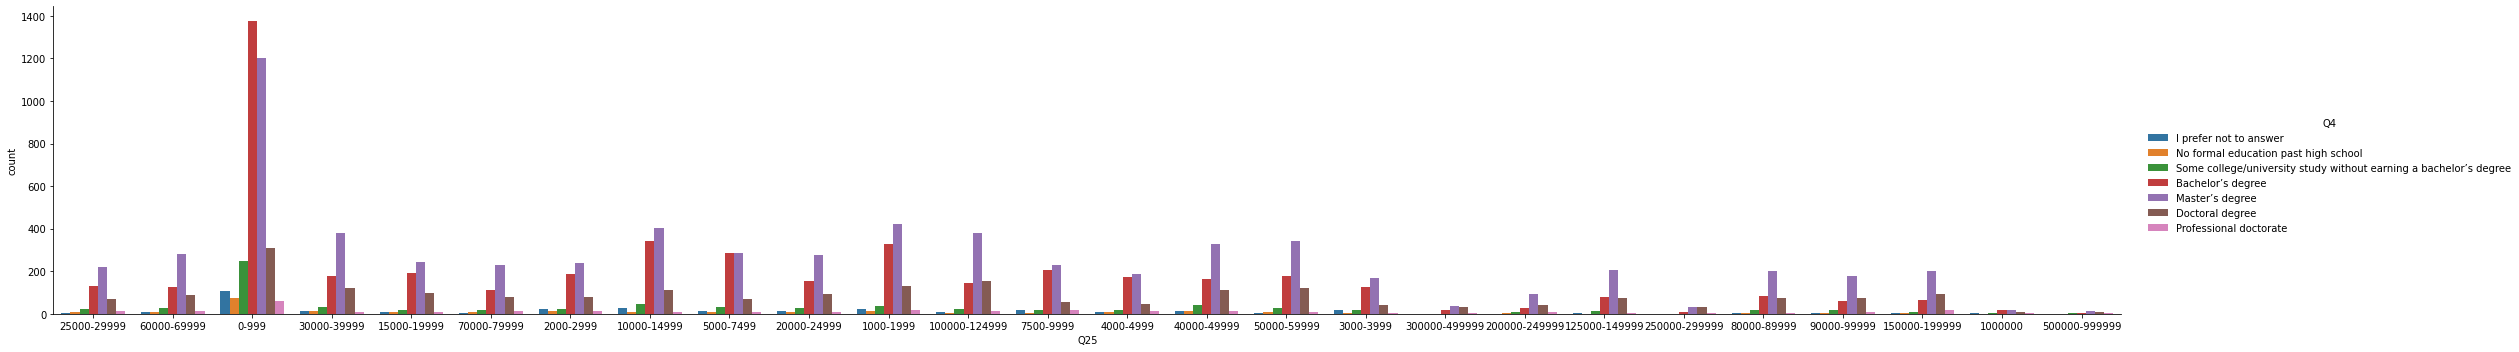

In [74]:
sns.catplot(x="Q25",kind='count',hue='Q4',data=df, aspect=6, hue_order=['I prefer not to answer',
                                                                        'No formal education past high school',
                                                                        'Some college/university study without earning a bachelor’s degree',
                                                                        'Bachelor’s degree',
                                                                        'Master’s degree',
                                                                        'Doctoral degree',
                                                                        'Professional doctorate',])

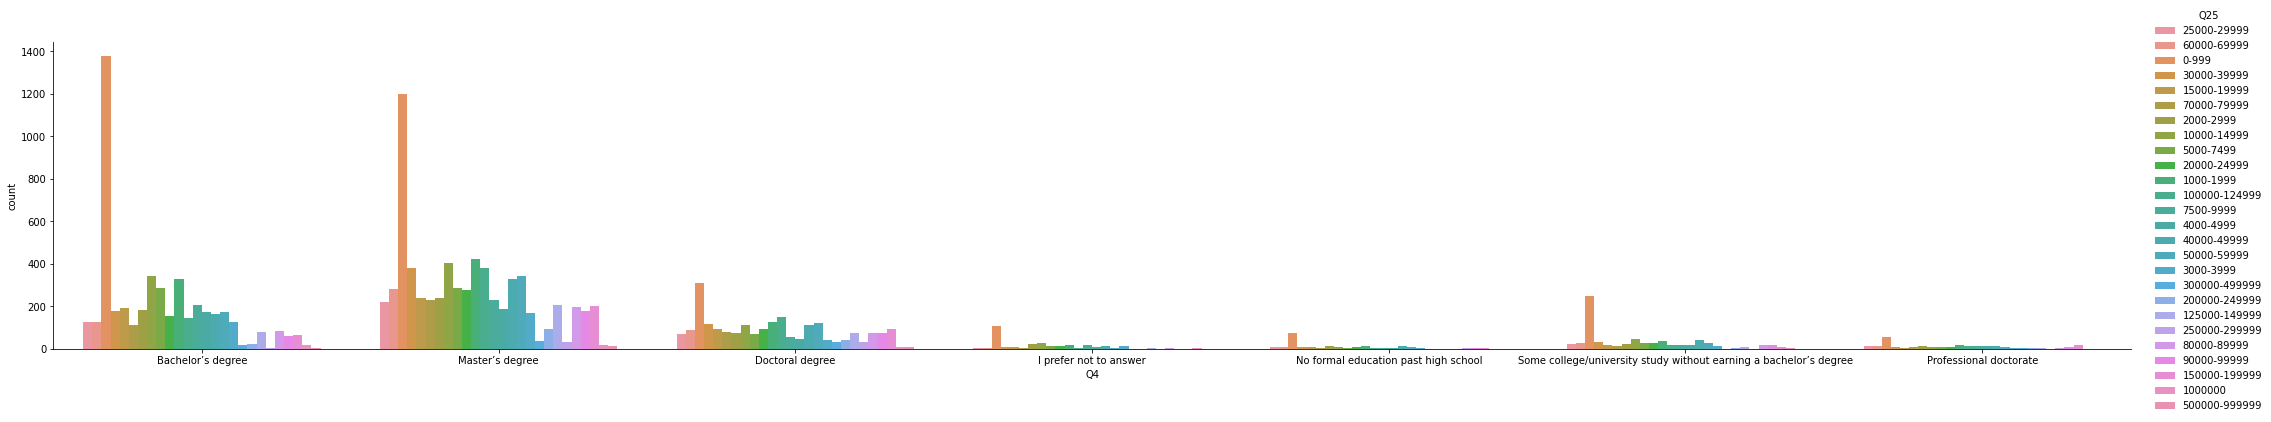

In [75]:
sns.catplot(x="Q4",kind='count',hue='Q25',data=df, aspect=6)

In [76]:
dataa['new_pay']

1        27499.5
2        64999.5
3          499.5
4        34999.5
5        34999.5
          ...   
25967     3499.5
25968    84999.5
25969    17499.5
25971      499.5
25973      499.5
Name: new_pay, Length: 15391, dtype: float64

In [77]:
dataa.new_pay

1        27499.5
2        64999.5
3          499.5
4        34999.5
5        34999.5
          ...   
25967     3499.5
25968    84999.5
25969    17499.5
25971      499.5
25973      499.5
Name: new_pay, Length: 15391, dtype: float64

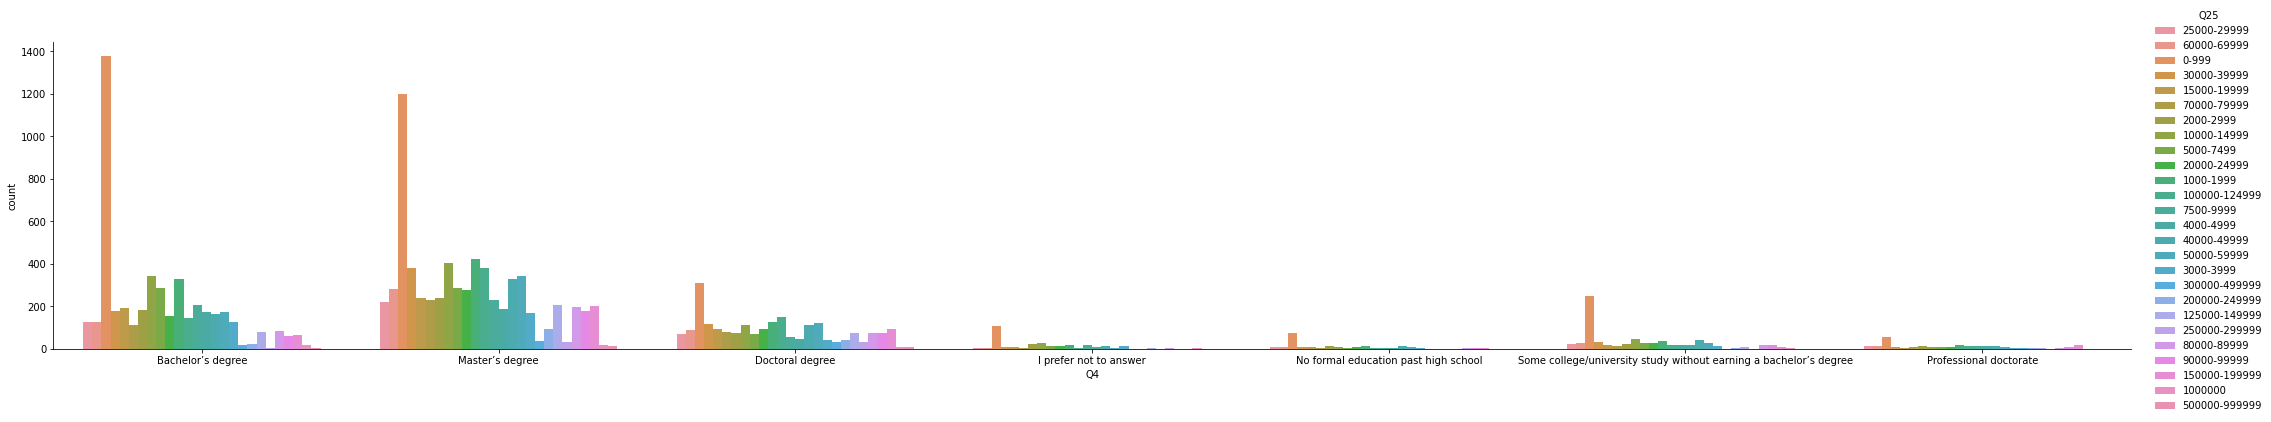

In [78]:
sns.catplot(x="Q4",kind='count',hue='Q25',data=df, aspect=6)

In [79]:
set(df['Q4'])

{'Bachelor’s degree',
 'Doctoral degree',
 'I prefer not to answer',
 'Master’s degree',
 'No formal education past high school',
 'Professional doctorate',
 'Some college/university study without earning a bachelor’s degree'}

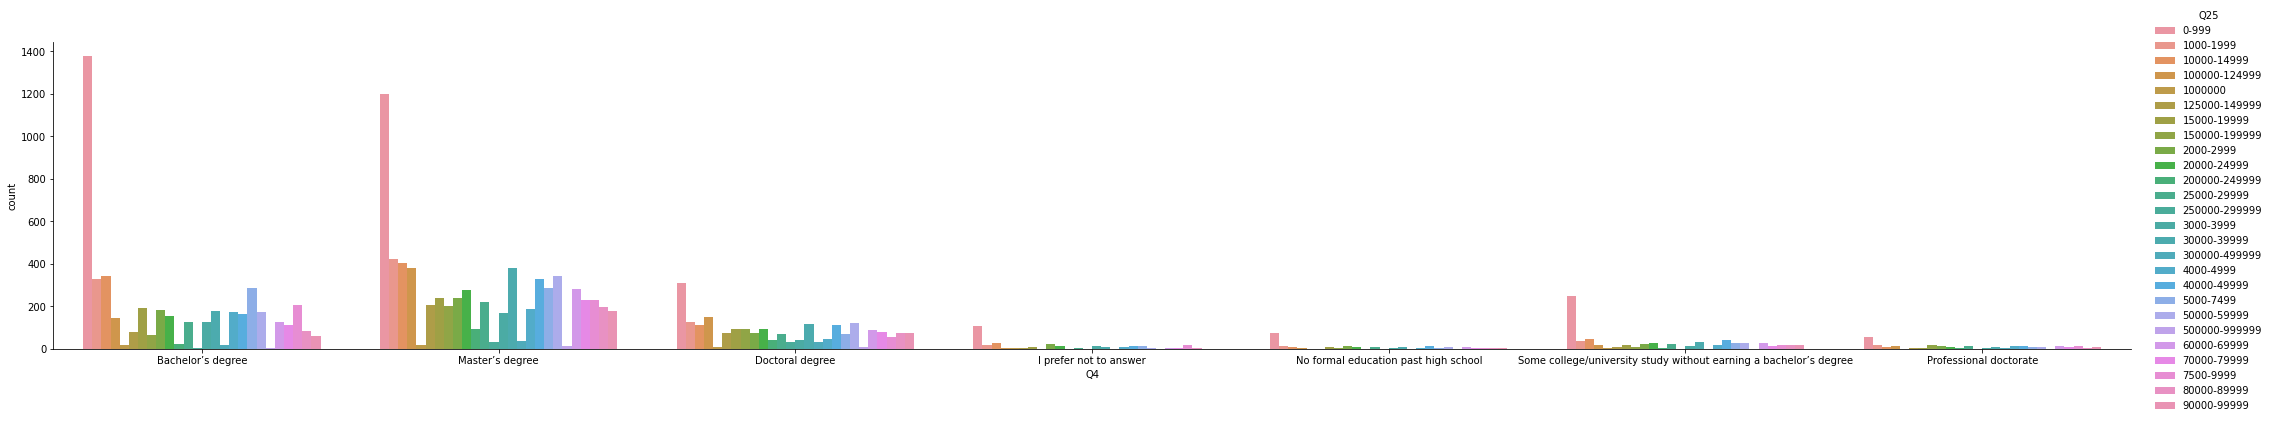

In [80]:
sns.catplot(x="Q4",kind='count',hue='Q25',data=df, aspect=6, hue_order = ['0-999','1000-1999','10000-14999','100000-124999','1000000','125000-149999','15000-19999','150000-199999','2000-2999','20000-24999','200000-249999','25000-29999',
 '250000-299999',
 '3000-3999',
 '30000-39999',
 '300000-499999',
 '4000-4999',
 '40000-49999',
 '5000-7499',
 '50000-59999',
 '500000-999999',
 '60000-69999',
 '70000-79999',
 '7500-9999',
 '80000-89999',
 '90000-99999'])

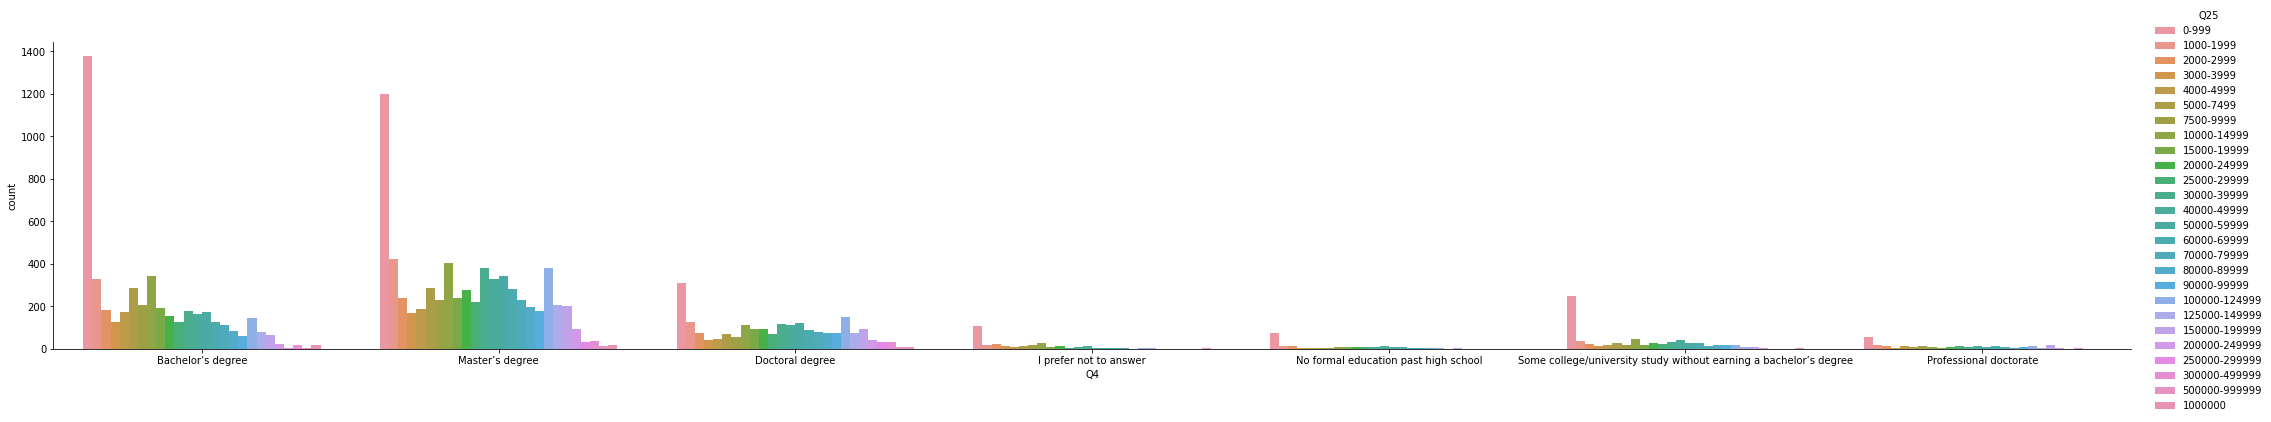

In [81]:
sns.catplot(x="Q4",kind='count',hue='Q25',data=df, aspect=6, hue_order =  ['0-999',
                                                                           '1000-1999',
                                                                           '2000-2999',
                                                                           '3000-3999',
                                                                           '4000-4999',
                                                                           '5000-7499',
                                                                           '7500-9999',
                                                                           '10000-14999',
                                                                           '15000-19999',
                                                                           '20000-24999',
                                                                           '25000-29999',
                                                                           '30000-39999',
                                                                           '40000-49999',
                                                                           '50000-59999',
                                                                           '60000-69999',
                                                                           '70000-79999',
                                                                           '80000-89999',
                                                                           '90000-99999',
                                                                           '100000-124999',
                                                                           '125000-149999',
                                                                           '150000-199999',
                                                                           '200000-249999',                                                                          
                                                                           '250000-299999',                                                                         
                                                                           '300000-499999',
                                                                           '500000-999999',
                                                                           '1000000'])                                                                                                                                                                                                                                                                                                                                                                                                                                               

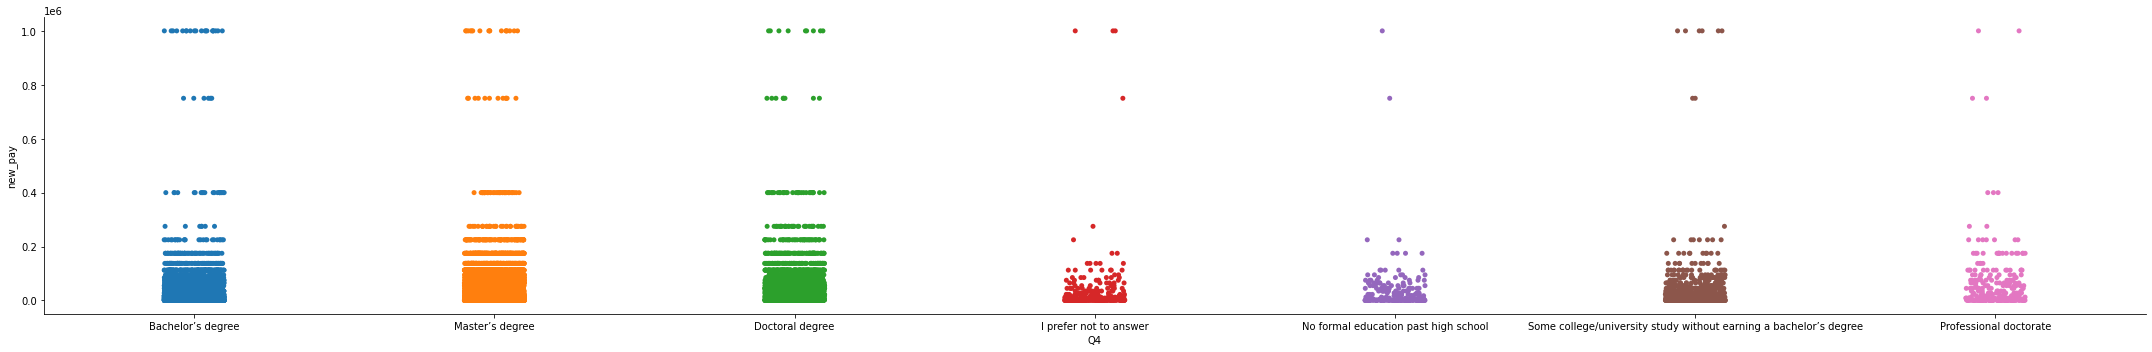

In [82]:
sns.catplot(x="Q4", y = 'new_pay',data=dataa , aspect = 6)

Education plays a vital role till masters degree. i.e., people who studied till masters are likely to earn more than bachelors. But when it comes to Doctoral and Professional doctoral degrees, more education means high pay is not valid.

In [83]:
#or maybe there are less no of people who have Professional doctorate degree in our dataset
dataa['Q4'].value_counts()

Master’s degree                                                      6799
Bachelor’s degree                                                    4777
Doctoral degree                                                      2217
Some college/university study without earning a bachelor’s degree     746
I prefer not to answer                                                334
Professional doctorate                                                290
No formal education past high school                                  228
Name: Q4, dtype: int64

In [84]:
#so let us find avg income of a person with that particular degree
b = dataa[dataa['Q4']=='Bachelor’s degree']
m = dataa[dataa['Q4']=='Master’s degree']
d = dataa[dataa['Q4']=='Doctoral degree']
noB = dataa[dataa['Q4']=='Some college/university study without earning a bachelor’s degree']
pd = dataa[dataa['Q4']=='Professional doctorate']
hs = dataa[dataa['Q4']=='No formal education past high school']

In [85]:
b_avg = (b['new_pay'].sum())/4777
m_avg = (m['new_pay'].sum())/6799
d_avg = (m['new_pay'].sum())/2217
noB_avg = (m['new_pay'].sum())/746
pd_avg = (m['new_pay'].sum())/290
hs_avg = (m['new_pay'].sum())/228

In [86]:
print(b_avg,m_avg,d_avg,noB_avg,pd_avg,hs_avg)

32017.086351266484 47336.86703927048 145170.66260712675 431425.41420911526 1109804.6862068966 1411593.6798245613


In [87]:
# Here, the average pay of people who didnt study anything after the highschool is 
# greater than people who have a masters degree which doesnt make sense

# this is because there are very less no of people who didnt study after their high school.
# so, taking avg is not appropriate here.

In [88]:
dataa['Q4'].value_counts()

Master’s degree                                                      6799
Bachelor’s degree                                                    4777
Doctoral degree                                                      2217
Some college/university study without earning a bachelor’s degree     746
I prefer not to answer                                                334
Professional doctorate                                                290
No formal education past high school                                  228
Name: Q4, dtype: int64

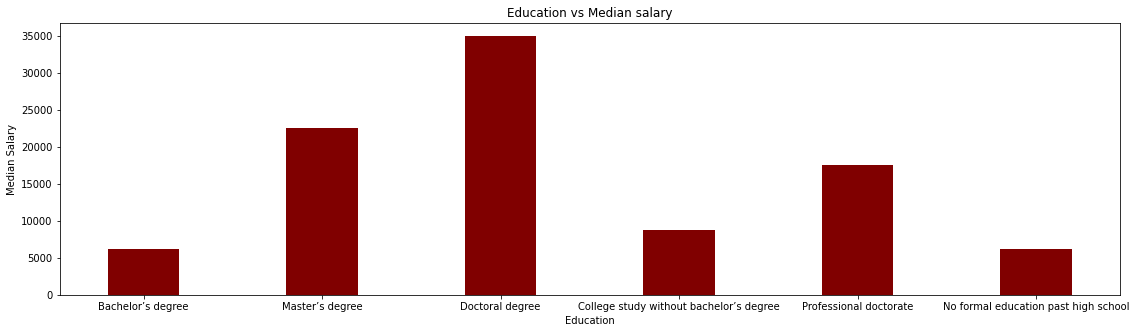

In [89]:
data56 = {'Bachelor’s degree'  : b['new_pay'].median(),
'Master’s degree' : m['new_pay'].median(),
'Doctoral degree' : d['new_pay'].median(),
'College study without bachelor’s degree' : noB['new_pay'].median(),
'Professional doctorate' : pd['new_pay'].median(),
'No formal education past high school' : hs['new_pay'].median()}
courses = list(data56.keys())
values = list(data56.values())
  
fig = plt.figure(figsize = (19, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Education")
plt.ylabel("Median Salary")
plt.title("Education vs Median salary")
plt.show()

A person with more education has a greater chance of earning more. However, experience plays a vital role in determining a person's salary.  As far as Pay is concerned,
***doctoral degree > Masters degree > Professional Doctorate > Bachelors degree***

# 4. what is the ratio of all the genders that are working

In [90]:
dataa.Q2.value_counts()

Man                        12642
Woman                       2482
Prefer not to say            196
Nonbinary                     47
Prefer to self-describe       24
Name: Q2, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'no of ppl working vs gender')

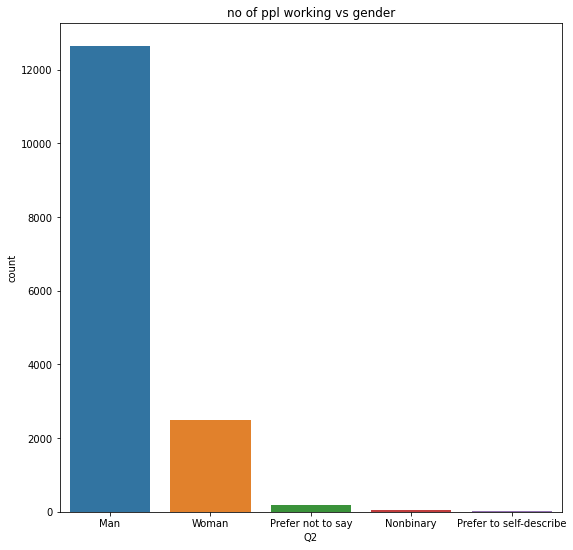

In [91]:
sns.countplot(dataa["Q2"])
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.title("no of ppl working vs gender")


The men:women:non-binary:other ratio is  12642 : 2482 : 196 : 47 : 24
clearly, it is male>female>non-binary>other

#  Which gender earns the most?

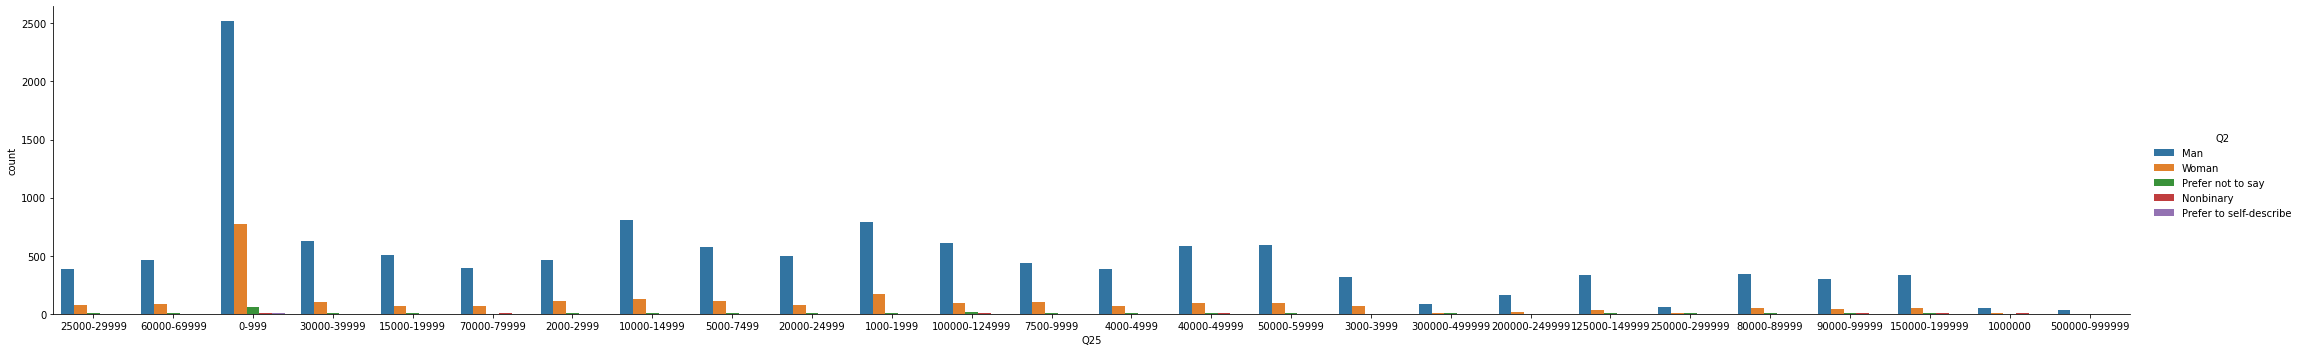

In [92]:
sns.catplot(x="Q25",kind='count',hue='Q2',data=dataa, aspect=6)

In [93]:
print(dataa[dataa['Q2']=='Nonbinary']['new_pay'].median())
print(dataa[dataa['Q2']=='Man']['new_pay'].median())

54999.5
17499.5


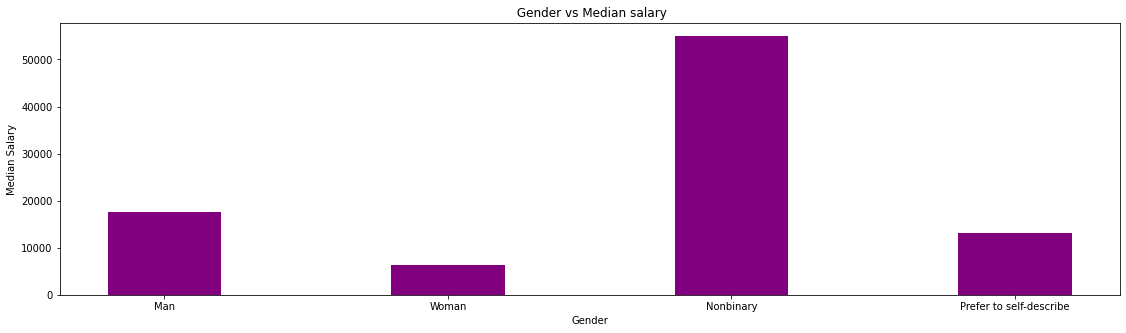

In [94]:
data99 = {'Man' : dataa[dataa['Q2']=='Man']['new_pay'].median(),
'Woman' : dataa[dataa['Q2']=='Woman']['new_pay'].median(),
'Nonbinary' : dataa[dataa['Q2']=='Nonbinary']['new_pay'].median(),
'Prefer to self-describe' : dataa[dataa['Q2']=='Prefer to self-describe']['new_pay'].median()}
courses = list(data99.keys())
values = list(data99.values())
  
fig = plt.figure(figsize = (19, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='purple',
        width = 0.4)
 
plt.xlabel("Gender")
plt.ylabel("Median Salary")
plt.title(" Gender vs Median salary")
plt.show()

The median Salary of non-binary people is the highest, followed by men and women.


# Which cloud computing platforms do people use regularly? 

In [95]:
df6 = dataa
df6 = df6[['Q27_A_Part_1','Q27_A_Part_2','Q27_A_Part_3','Q27_A_Part_4','Q27_A_Part_5','Q27_A_Part_6','Q27_A_Part_7','Q27_A_Part_8','Q27_A_Part_9','Q27_A_Part_10','Q27_A_Part_11','Q27_A_OTHER']]

In [96]:
df6.apply(lambda x: x.value_counts())

,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER
Alibaba Cloud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.0,NaN,NaN,NaN
Amazon Web Services (AWS),3721.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Google Cloud Platform (GCP),NaN,NaN,3142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IBM Cloud / Red Hat,NaN,NaN,NaN,572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Microsoft Azure,NaN,2450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oracle Cloud,NaN,NaN,NaN,NaN,454.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAP Cloud,NaN,NaN,NaN,NaN,NaN,290.0,NaN,NaN,NaN,NaN,NaN,NaN
Salesforce Cloud,NaN,NaN,NaN,NaN,NaN,NaN,275.0,NaN,NaN,NaN,NaN,NaN
Tencent Cloud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172.0,NaN,NaN
VMware Cloud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390.0,NaN,NaN,NaN,NaN


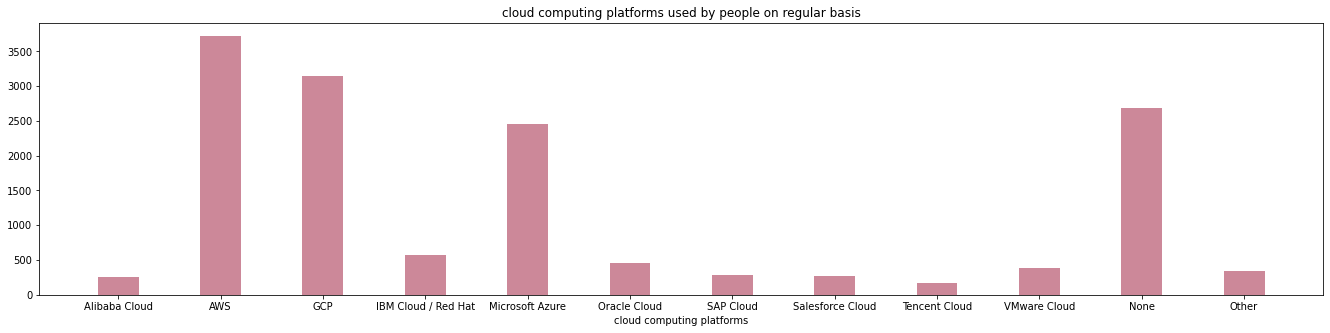

In [97]:
data1001 = {'Alibaba Cloud' : 259.0,
            'AWS' : 3721.0,
            'GCP' : 3142.0,
            'IBM Cloud / Red Hat' : 572.0,
            'Microsoft Azure' : 2450.0,
            'Oracle Cloud' : 454.0,
            'SAP Cloud' : 290.0,
            'Salesforce Cloud' : 275.0,
            'Tencent Cloud' : 172.0,
            'VMware Cloud' : 390.0,
            'None' : 2689.0,
            'Other' : 337.0}
courses = list(data1001.keys())
values = list(data1001.values())
  
fig = plt.figure(figsize = (23, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='#CC8899',
        width = 0.4)
 
plt.xlabel("cloud computing platforms")
plt.title("cloud computing platforms used by people on regular basis")
plt.show()

Most people use AWS (Amazon Web Services), GCP (Google Cloud Platform), and Microsoft Azure

# 7. Does more experience mean more money?

In [98]:
old8 = df[(df['Q6'].isin(['20+ years','10-20 years']))]
new8 = df[(df['Q6'].isin(['1-3 years','< 1 years']))]

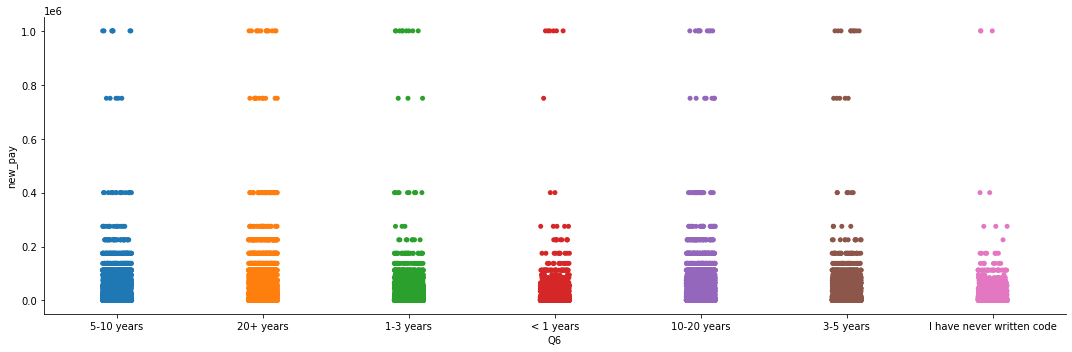

In [99]:
sns.catplot(x="Q6", y = 'new_pay',data=dataa , aspect = 3)

In [100]:
df.Q6.value_counts()

1-3 years                    3691
< 1 years                    2463
3-5 years                    2461
5-10 years                   2345
10-20 years                  1846
20+ years                    1624
I have never written code     961
Name: Q6, dtype: int64

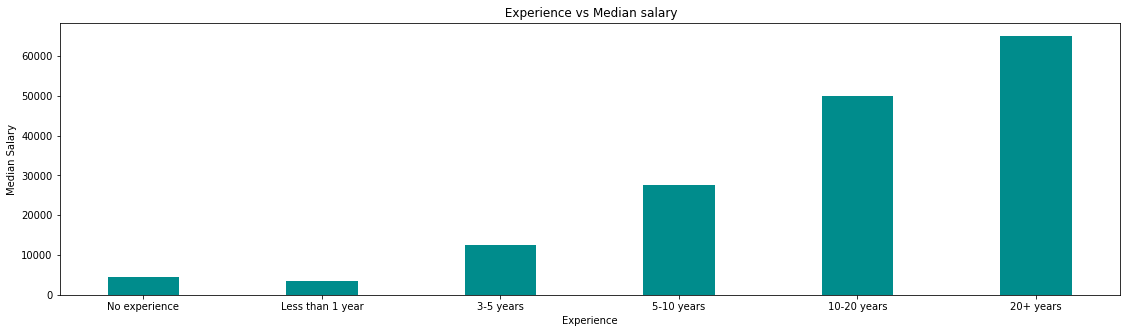

In [101]:
data1000 = {'No experience' : dataa[dataa['Q6']=='I have never written code']['new_pay'].median(),
'Less than 1 year' : dataa[dataa['Q6']=='< 1 years']['new_pay'].median(),
'3-5 years' : dataa[dataa['Q6']=='3-5 years']['new_pay'].median(),
'5-10 years' : dataa[dataa['Q6']=='5-10 years']['new_pay'].median(),
'10-20 years' : dataa[dataa['Q6']=='10-20 years']['new_pay'].median(),
'20+ years' : dataa[dataa['Q6']=='20+ years']['new_pay'].median()}
courses = list(data1000.keys())
values = list(data1000.values())
  
fig = plt.figure(figsize = (19, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='#008C8C',
        width = 0.4)
 
plt.xlabel("Experience")
plt.ylabel("Median Salary")
plt.title(" Experience vs Median salary")
plt.show()

Experience does lead to more money. Those with experience of 20+ years earn significantly more than those with experience of 3-5 years

#Is there any relationship between the amount of money spent on learning machine learning and their Pay?

In [102]:
dataa['Q26'].value_counts()

$0 ($USD)                  5903
$100-$999                  2534
$1000-$9,999               2491
$1-$99                     1929
$10,000-$99,999            1309
$100,000 or more ($USD)    1017
Name: Q26, dtype: int64

In [103]:
dataa['Q26'] = dataa['Q26'].str.replace(',', '')
dataa['Q26'] = dataa['Q26'].str.replace('$', '')
dataa['Q26'] = dataa['Q26'].str.replace('>', '')
dataa['Q26'] = dataa['Q26'].str.replace('(USD)', '')
dataa['Q26'] = dataa['Q26'].str.replace(' or more ()', '')
dataa['Q26'] = dataa['Q26'].str.replace('1000-9999', '4499.5')
dataa['Q26'] = dataa['Q26'].str.replace("100-999", '449.5')
dataa['Q26'] = dataa['Q26'].str.replace('1-99', '49')
dataa['Q26'] = dataa['Q26'].str.replace('10000-99999', '44999.5')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [104]:
def remove(x):
  h = str(x)
  if h[-2:]=='()':
    h = h[:-2]
    h = ''.join(h.split())
    return h
  if h[-2:]!= "()":
    return h

In [105]:
dataa['spent_money']=dataa.Q26.apply(remove)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [106]:
dataa['spent_money'].value_counts()

0          5903
449.5      2534
4499.5     2491
49         1929
44999.5    1309
100000     1017
nan         208
Name: spent_money, dtype: int64

In [107]:
dataa8 = dataa[['new_pay',"spent_money"]]
dataa8.head()

,new_pay,spent_money
1,27499.5,449.5
2,64999.5,0
3,499.5,0
4,34999.5,0
5,34999.5,4499.5


In [108]:
data.Q26.value_counts()

$0 ($USD)                                                                                                                                                                      5903
$100-$999                                                                                                                                                                      2534
$1000-$9,999                                                                                                                                                                   2491
$1-$99                                                                                                                                                                         1929
$10,000-$99,999                                                                                                                                                                1309
$100,000 or more ($USD)                                                                             

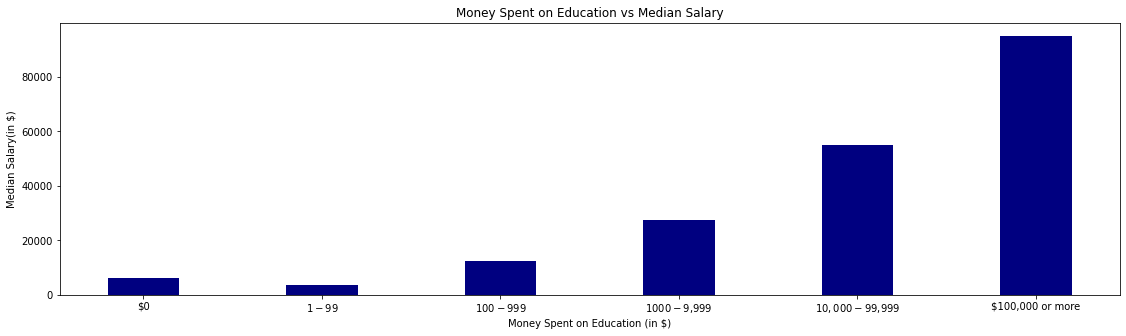

In [109]:
data500 = {'$0'  : dataa[dataa['spent_money']=='0']['new_pay'].median(),
'$1-$99' : dataa[dataa['spent_money']=='49']['new_pay'].median(),
'$100-$999' : dataa[dataa['spent_money']=='449.5']['new_pay'].median(),
'$1000-$9,999' : dataa[dataa['spent_money']=='4499.5']['new_pay'].median(),
'$10,000-$99,999' : dataa[dataa['spent_money']=='44999.5']['new_pay'].median(),
'$100,000 or more' : dataa[dataa['spent_money']=='100000']['new_pay'].median()}
courses = list(data500.keys())
values = list(data500.values())
  
fig = plt.figure(figsize = (19, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='#000080',
        width = 0.4)
 
plt.xlabel("Money Spent on Education (in $)")
plt.ylabel("Median Salary(in $)")
plt.title("Money Spent on Education vs Median Salary")
plt.show()

In general, the **more** they spend on studying machine learning, the **higher** their Salary will be.

# 9. which language is recommended the most

In [110]:
data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,...,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool

In [111]:
a = df['Q8'].value_counts()

In [112]:
set(df['Q5'])

{'Business Analyst',
 'DBA/Database Engineer',
 'Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Developer Relations/Advocacy',
 'Machine Learning Engineer',
 'Other',
 'Product Manager',
 'Program/Project Manager',
 'Research Scientist',
 'Software Engineer',
 'Statistician'}

In [113]:
df['Q8'].value_counts()

Python        11586
SQL             939
R               904
C++             196
C               196
MATLAB          129
Java            122
Other           106
Julia            98
Javascript       69
None             55
Bash             23
Swift             7
Name: Q8, dtype: int64

In [114]:
df['Q8'].value_counts().sum()

14430

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Recommended language for the aspirants')

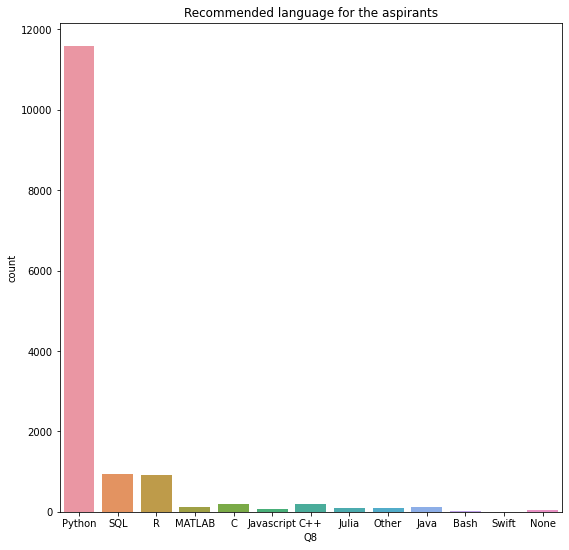

In [115]:
sns.countplot(df["Q8"])
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.title("Recommended language for the aspirants")


In [116]:
ml = df[df['Q5'] == 'Machine Learning Engineer']
ds = df[df['Q5'] == 'Data Scientist']
swd = df[df['Q5'] == 'Software Engineer']
pm = df[df['Q5'] == 'Product Manager']

In [117]:
#percentage of people who recomended this particular language
print((ml['Q8'].value_counts()*100)/ml['Q8'].value_counts().sum())

Python        87.587822
C++            2.419984
SQL            2.185792
R              2.029664
C              1.951600
MATLAB         1.092896
Java           0.936768
Other          0.858704
Julia          0.546448
Javascript     0.234192
None           0.156128
Name: Q8, dtype: float64


In [118]:
print((ds['Q8'].value_counts()*100)/ds['Q8'].value_counts().sum())

Python        82.306477
SQL            7.014218
R              6.445498
C              1.358610
C++            0.789889
MATLAB         0.600316
Julia          0.410742
Other          0.379147
Java           0.315956
Javascript     0.189573
Bash           0.094787
None           0.063191
Swift          0.031596
Name: Q8, dtype: float64


In [119]:
print((swd['Q8'].value_counts()*100)/swd['Q8'].value_counts().sum())

Python        84.758720
SQL            4.300048
R              2.532250
C++            1.863354
C              1.815576
Java           1.337793
Julia          1.003344
Other          0.668896
Javascript     0.525561
None           0.430005
MATLAB         0.430005
Bash           0.191113
Swift          0.143335
Name: Q8, dtype: float64


In [120]:
print((pm['Q8'].value_counts()*100)/pm['Q8'].value_counts().sum())

Python    81.781377
SQL        7.692308
R          4.453441
Julia      1.619433
C++        0.809717
MATLAB     0.809717
Java       0.809717
C          0.809717
None       0.809717
Bash       0.404858
Name: Q8, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Recommended language to start with for an aspiring Machine Learning Engineer ')

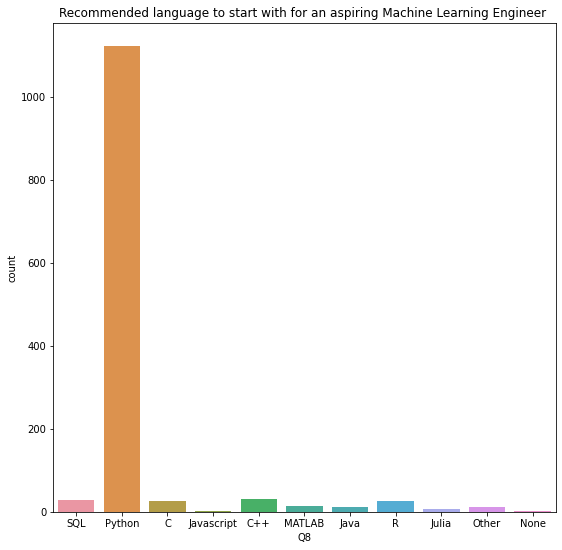

In [121]:
sns.countplot(ml["Q8"])
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.title("Recommended language to start with for an aspiring Machine Learning Engineer ")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Recommended language to start with for an aspiring Data Scientist ')

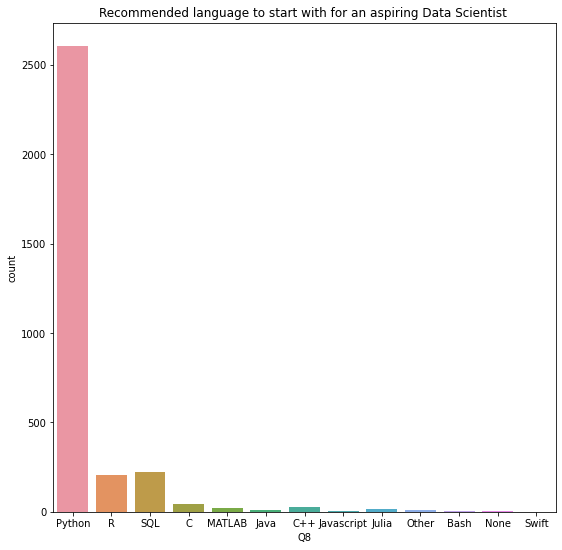

In [122]:
sns.countplot(ds["Q8"])
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.title("Recommended language to start with for an aspiring Data Scientist ")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Recommended language to start with for an aspiring Software Engineer ')

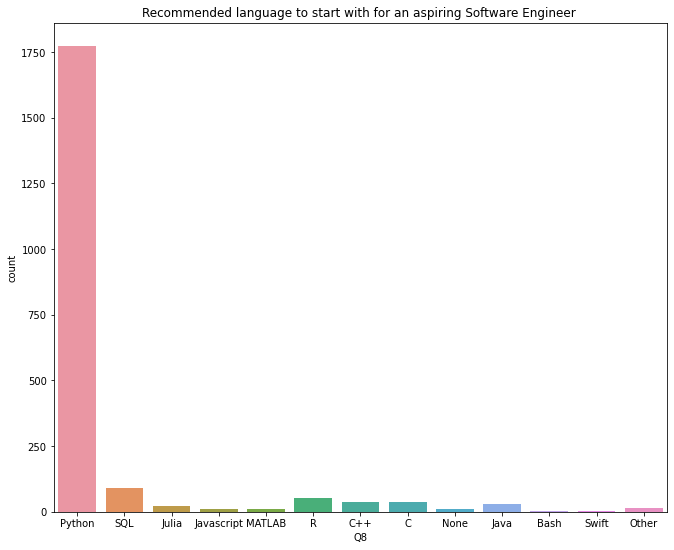

In [123]:
sns.countplot(swd["Q8"])
fig = plt.gcf()
fig.set_size_inches(11,9)
plt.title("Recommended language to start with for an aspiring Software Engineer ")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Recommended language to start with for an aspiring Product Manager ')

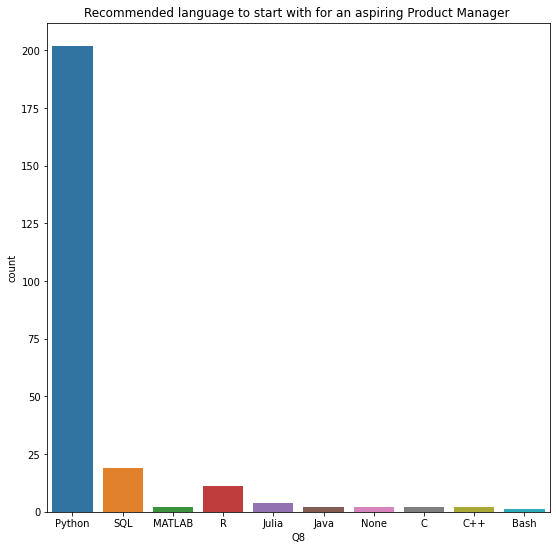

In [124]:
sns.countplot(pm["Q8"])
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.title("Recommended language to start with for an aspiring Product Manager ")

In [125]:
swd.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,...,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER,new_pay,spent_money
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,Other,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DataRobot AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499.5,0
39,625,22-24,Man,Japan,No formal education past high school,Software Engineer,3-5 years,Python,NaN,SQL,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,Other,Python,NaN,NaN,Visual Studio,Visual Studio Code (VSCode),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated data augmentation (e.g. imgaug, albu...",Automated feature engineering/selection (e.g. ...,"Automated model selection (e.g. auto-sklearn, ...",Automated model architecture searches (e.g. da...,Automated hyperparameter tuning (e.g. hyperopt...,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,Amazon Sagemaker Autopilot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,2499.5,0
43,976,55-59,Man,United States of America,Master’s degree,Software Engineer,10-20 years,Python,NaN,SQL,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Binder / JupyterHub,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17499.5,4499.5
56,1006,22-24,Woman,Bangladesh,Bachelor’s degree,Software Engineer,5-10 years,NaN,NaN,NaN,NaN,C++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Python,NaN,NaN,Visual Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,8749.5,0
73,4971,30-34,Woman,"Iran, Islamic Republic of...",Master’s degree,Software Engineer,5-10 years,NaN,NaN,SQL,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,NaN,NaN,Notepad++,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,...,Qlik,Domo,TIBCO Spotfire,Alteryx,Sisense,SAP Analytics Cloud,Microsoft Azure Synapse,Thoughtspot,NaN,NaN,"Automated data augmentation (e.g. imgaug, albu...",Automated feature engineering/selection (e.g. ...,"Automated model selection (e.g. auto-sklearn, ...",Automated model architecture searches (e.g. da...,Automated hyperparameter tuning (e.g. hyperopt...,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,Google Cloud AutoML,H2O Driverless AI,Databricks AutoML,DataRobot AutoML,Amazon Sagemaker Autopilot,Azure Automated Machine Learning,NaN,NaN,Neptune.ai,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,ClearML,Domino Model Monitor,MLflow,NaN,NaN,3499.5,0


In [126]:
set(df.Q25)

{'0-999',
 '1000-1999',
 '10000-14999',
 '100000-124999',
 '1000000',
 '125000-149999',
 '15000-19999',
 '150000-199999',
 '2000-2999',
 '20000-24999',
 '200000-249999',
 '25000-29999',
 '250000-299999',
 '3000-3999',
 '30000-39999',
 '300000-499999',
 '4000-4999',
 '40000-49999',
 '5000-7499',
 '50000-59999',
 '500000-999999',
 '60000-69999',
 '70000-79999',
 '7500-9999',
 '80000-89999',
 '90000-99999'}

In [127]:
rich = df[(df['Q25'].isin(['300000-499999','100000-124999','125000-149999','500000-999999','150000-199999','200000-249999','250000-299999','300000-499999','1000000','500000-999999',]))]
rich.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,...,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER,new_pay,spent_money
24,773,35-39,Man,Brazil,Master’s degree,Machine Learning Engineer,20+ years,Python,NaN,SQL,NaN,C++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SQL,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,"Automated data augmentation (e.g. imgaug, albu...",Automated feature engineering/selection (e.g. ...,"Automated model selection (e.g. auto-sklearn, ...",Automated model architecture searches (e.g. da...,Automated hyperparameter tuning (e.g. hyperopt...,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,Google Cloud AutoML,H2O Driverless AI,Databricks AutoML,DataRobot AutoML,Amazon Sagemaker Autopilot,Azure Automated Machine Learning,NaN,NaN,NaN,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112499.5,0
32,317,30-34,Man,India,Master’s degree,Data Scientist,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112499.5,100000
46,660,40-44,Man,Israel,Master’s degree,Data Scientist,3-5 years,Python,NaN,NaN,NaN,C++,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,Notepad++,NaN,NaN,MATLAB,Jupyter Notebook,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112499.5,44999.5
50,557,30-34,Woman,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112499.5,4499.5
77,1293,50-54,Man,United States of America,Master’s degree,Data Engineer,20+ years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,NaN,NaN,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,399999.5,100000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Recommended language to start with for aspirants ')

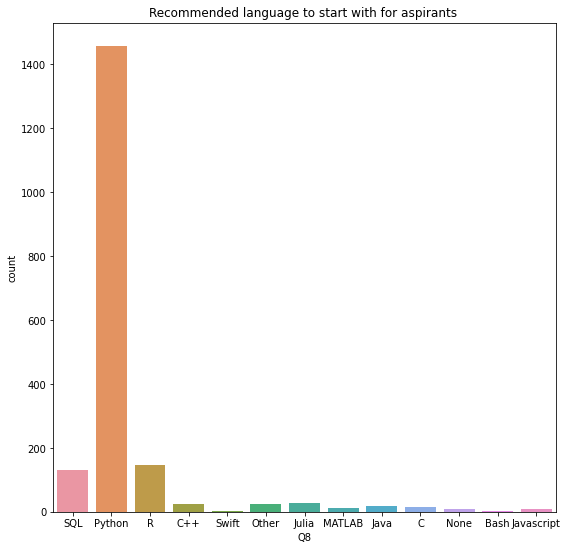

In [130]:
sns.countplot(rich["Q8"])
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.title("Recommended language to start with for aspirants ")

80% of the crowd recommend **Python** as the best language to start with, followed by SQL (6.50%) and R (6.26%). According to profile-specific recommendations, the following languages are top-recommended for each of the following profiles:

Machine Learning Engineer: Python (87%) , C++ (2%)

Data Scientist: Python (82%), SQL(7%), R(6.4%)

Software Engineer: Python (84%), SQL(4%)

Product Manager : Python(81%), SQL(7%)